In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import skimage
from skimage import io
from skimage.feature import graycomatrix, graycoprops
import seaborn as sns
from scipy.stats import skew,kurtosis,entropy
from tqdm import tqdm

In [135]:
PATH = Path().cwd().parent.parent
DDIR = PATH / 'datasets'


In [106]:
print(PATH)

e:\Folder_apps\NGODING\Python\PDM


In [136]:
image_allowed = [int(x) for x in range(301,311)]
image_allowed

[301, 302, 303, 304, 305, 306, 307, 308, 309, 310]

In [137]:
test_data = io.imread(f'{DDIR}/happy/happy-0001.jpg')

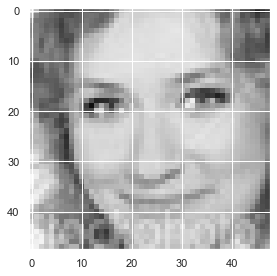

In [138]:
io.imshow(test_data)

In [139]:
print(np.shape(test_data))

(48, 48)


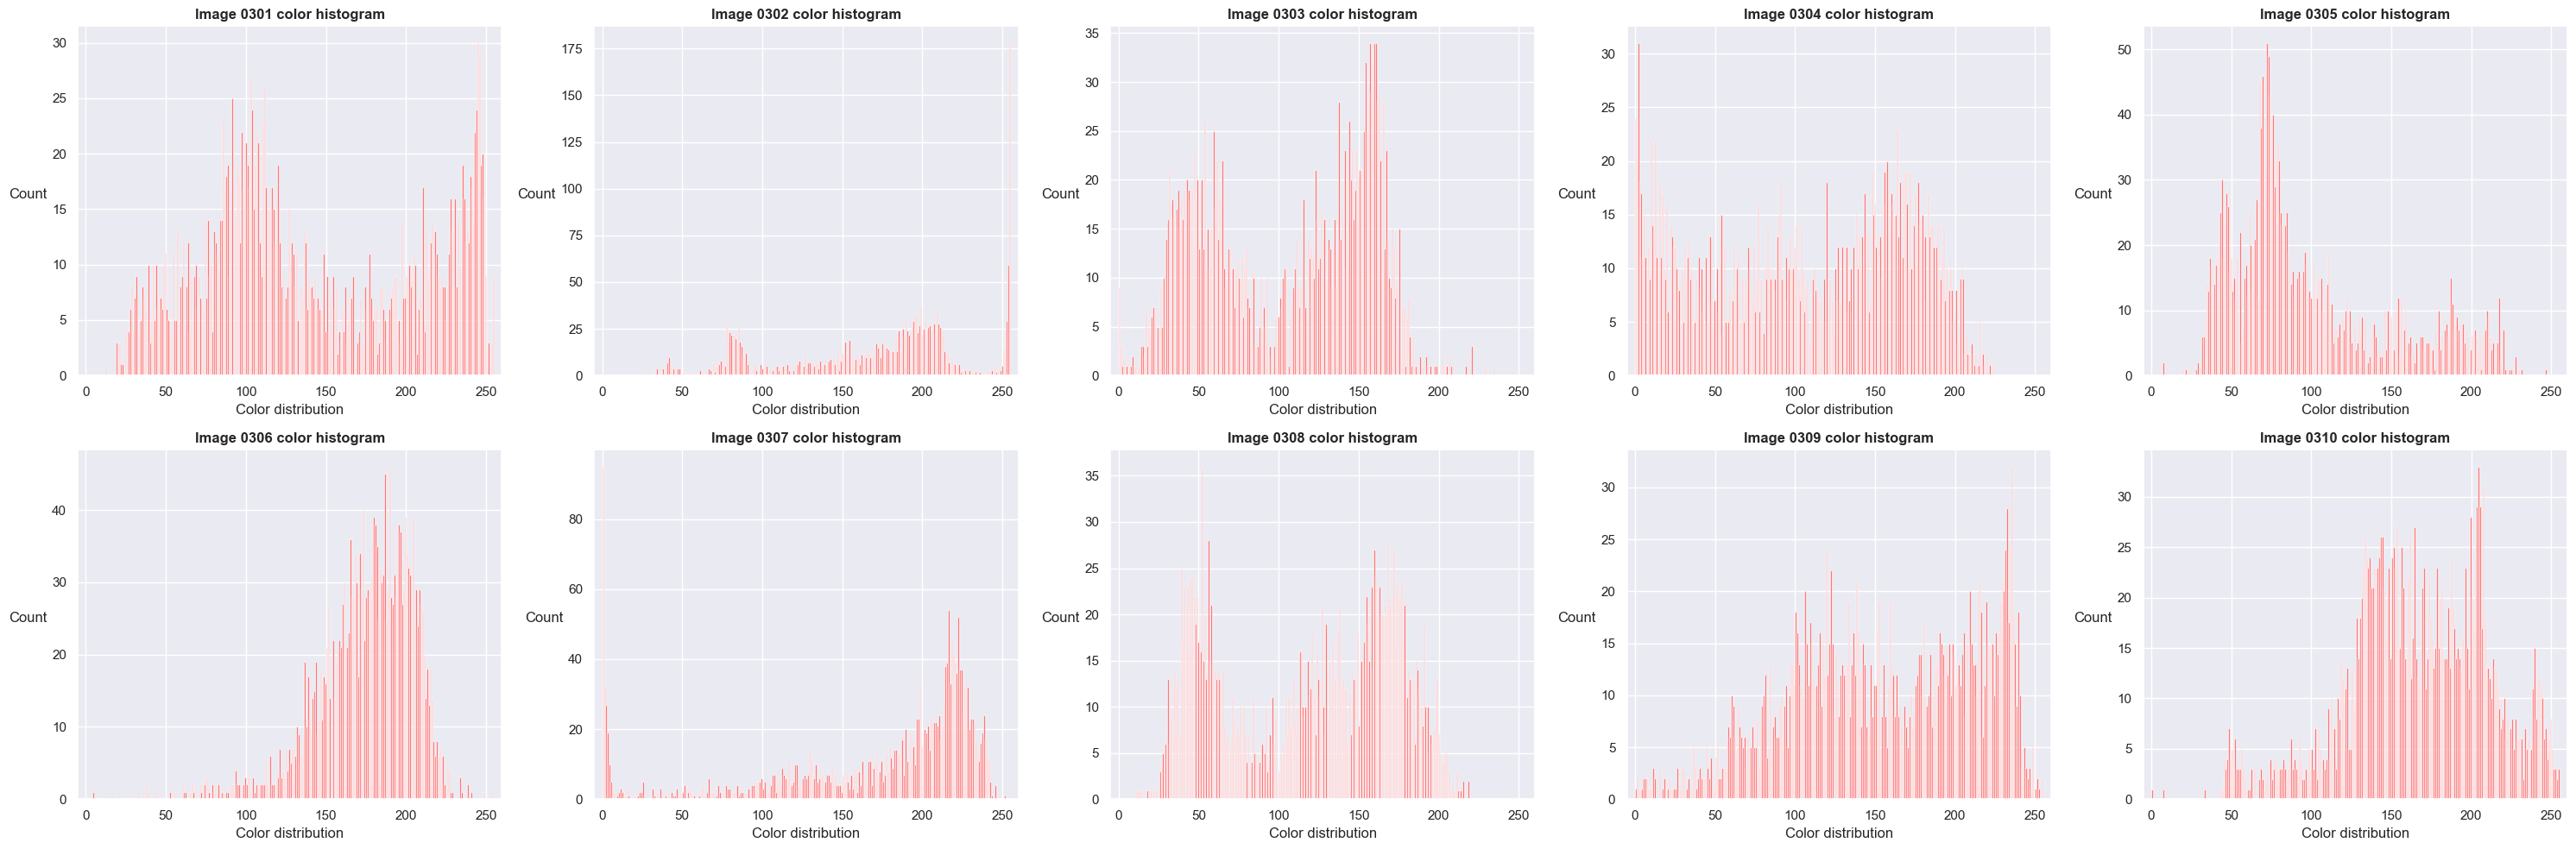

In [140]:
fig, ax = plt.subplots(nrows=len(image_allowed)//5, ncols=5, figsize=(30,10), dpi=100)
for num,image in enumerate(image_allowed):
    sns.set(style="darkgrid")
    test_data = io.imread(f'{DDIR}/happy/happy-{image:04d}.jpg')
    test_data = np.reshape(test_data, (48*48))
    # print(np.shape(test_data))
    ax[num//5][num%5].hist(test_data, bins=255, color='red', alpha=0.7, rwidth=0.85)
    ax[num//5][num%5].set_title(f'Image {image:04d} color histogram', weight='bold')
    ax[num//5][num%5].set_xlim(-5,260)
    # ax[num//5][num%5].set_ylim(0,200)
    ax[num//5][num%5].set_xlabel('Color distribution')
    ax[num//5][num%5].set_ylabel('Count',rotation=0,labelpad=20)
    # print(test_data.min(), test_data.max())
    # print(test_data)
plt.sharey = True
plt.tight_layout()
plt.show()

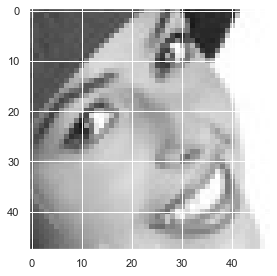

In [141]:
test_data = io.imread(f'{DDIR}/happy/happy-0302.jpg')
io.imshow(test_data)

In [142]:
#Ciri Orde Pertama
#A. Mean
image_name = []
all_image = []
for num,image in enumerate(image_allowed):
    test_data = io.imread(f'{DDIR}/happy/happy-{image:04d}.jpg')
    all_image.append(test_data)
    image_name.append(f'happy-{image:04d}')
    test_data = np.reshape(test_data, (48*48))
    print(f'Image    : happy-{image:04d}')
    print(f'Mean     : {np.mean(test_data):>20.2f}')
    #sum(test_data)/len(test_data) 
    print(f'Variance : {np.var(test_data, dtype=np.float64):>20.2f}')
    #sum((test_data - mean(tes_data)**2 / len(test_data)-1)
    print(f'Skewness : {skew(test_data):>20.2f}')
    print(f'Kurtosis : {kurtosis(test_data):>20.2f}')
    print(f'Entropy  : {entropy(test_data):>20.2f}')
    print(f'-=-')
    

Image    : happy-0301
Mean     :               141.95
Variance :              4435.50
Skewness :                 0.18
Kurtosis :                -1.23
Entropy  :                 7.63
-=-
Image    : happy-0302
Mean     :               170.85
Variance :              3369.10
Skewness :                -0.49
Kurtosis :                -0.63
Entropy  :                 7.68
-=-
Image    : happy-0303
Mean     :               105.50
Variance :              2574.05
Skewness :                -0.18
Kurtosis :                -1.33
Entropy  :                 7.61
-=-
Image    : happy-0304
Mean     :               104.65
Variance :              4022.48
Skewness :                -0.14
Kurtosis :                -1.30
Entropy  :                 7.52
-=-
Image    : happy-0305
Mean     :                99.07
Variance :              2479.58
Skewness :                 0.89
Kurtosis :                -0.24
Entropy  :                 7.62
-=-
Image    : happy-0306
Mean     :               175.30
Variance :      

In [150]:
first_order_dataframe = pd.DataFrame(columns=['Label','Mean','Variance','Skewness','Kurtosis','Entropy'])
type = 'happy'
for num,value in enumerate(image_allowed):
    data_first_order = []
    image_data = io.imread(f'{DDIR}/{type}/{type}-{value:04d}.jpg')
    image_data = np.reshape(image_data, (48*48))
    data_first_order.append(f'{type}-{value:04d}')

    data_first_order.append(np.mean(image_data))

    data_first_order.append(np.var(image_data, dtype=np.float64))

    data_first_order.append(skew(image_data))

    data_first_order.append(kurtosis(image_data))

    data_first_order.append(entropy(image_data))
    first_order_dataframe.loc[len(first_order_dataframe)] = data_first_order

In [153]:
first_order_dataframe.index=first_order_dataframe['Label']
first_order_dataframe.drop(columns=['Label'], inplace=True)
first_order_dataframe.T

Label,happy-0301,happy-0302,happy-0303,happy-0304,happy-0305,happy-0306,happy-0307,happy-0308,happy-0309,happy-0310
Mean,141.945747,170.851128,105.504774,104.648003,99.069878,175.297743,169.018663,118.232639,155.252170,165.484809
Variance,4435.499227,3369.098931,2574.052929,4022.477227,2479.578016,905.293294,4878.588627,2853.780949,3366.452469,1940.394735
Skewness,0.183071,-0.488325,-0.180534,-0.137563,0.886685,-1.163049,-1.293985,-0.202303,-0.305212,-0.380910
Kurtosis,-1.230118,-0.629787,-1.326098,-1.300467,-0.238892,2.483887,0.567502,-1.351343,-0.837335,0.052966
Entropy,7.626983,7.677608,7.611944,7.517896,7.623801,7.725989,7.612527,7.629495,7.663795,7.703842


In [149]:
display(first_order_dataframe)

In [115]:
def get_glcm(image, derajat=0, jarak=1):
    derajat_acc = [0, 45, 90, 135]
    if(derajat not in derajat_acc):
        print('Derajat tidak dikenali')
        return
    image_max = np.max(image)
    print(image_max)
    glcm_matrix = np.zeros((image_max+1, image_max+1), dtype=int)
    if(derajat == 0):
        for i in range(image.shape[0]-jarak):
            for j in range(image.shape[1]-jarak):
                glcm_matrix[image[i,j], image[i+jarak,j+jarak]] += 1
    elif(derajat == 45):
        for i in range(image.shape[0]-jarak):
            for j in range(jarak, image.shape[1]):
                glcm_matrix[image[i,j], image[i+jarak,j-jarak]] += 1
    elif(derajat == 90):
        for i in range(image.shape[0]-jarak):
            for j in range(image.shape[1]):
                glcm_matrix[image[i,j], image[i+jarak,j]] += 1
    else:
        for i in range(image.shape[0]-jarak):
            for j in range(image.shape[1]-jarak):
                glcm_matrix[image[i,j], image[i+jarak,j+jarak]] += 1

    glcm_transposed = glcm_matrix.T
    glcm_matrix = glcm_matrix + glcm_transposed
    glcm_all_value = np.sum(glcm_matrix)
    glcm_matrix = glcm_matrix / glcm_all_value
    return glcm_matrix

In [116]:
def glcm_0(image):
    image_max = np.max(image)
    image_matrix_temp = np.zeros((image_max+1, image_max+1), dtype=int)
    for i in range(len(image)):
        for j in range(len(image[i])-1):
            image_matrix_temp[image[i,j], image[i,j+1]] += 1
    
    transposed_matrix = np.transpose(image_matrix_temp)
    image_matrix = image_matrix_temp + transposed_matrix

    temp = 0
    for i in range(len(image_matrix)):
        for j in range(len(image_matrix[i])):
            temp += image_matrix[i,j]
    
    for i in range(len(image_matrix)):
        for j in range(len(image_matrix[i])):
            image_matrix[i,j] = image_matrix[i,j] / temp

    return image_matrix

In [117]:
test_data = io.imread(f'{DDIR}/happy/happy-0302.jpg')
data_glcm = pd.DataFrame(get_glcm(test_data, 0, 1))
data_glcm

255


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000226,0.000000,0.000000,0.000453,0.000226,0.000905,0.000679,0.001132
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000226,0.000226,0.000000,0.000226,0.000000,0.001132,0.000905,0.002943
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000226,0.000905,0.001132,0.000000,0.003622,0.005206
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000226,0.000000,0.000226,0.000226,0.000000,0.000679,0.000905,0.003622,0.001811,0.014486


In [118]:
glcm_derajat0 = glcm_0(test_data)
print(np.shape(glcm_derajat0))
glcm0 = pd.DataFrame(glcm_derajat0)
glcm0.max().sum()

(256, 256)


0

In [119]:
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
        glcm = graycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
        # idms = [idm(p) for p in glcm]
        feature = []
        glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
        for item in glcm_props:
                feature.append(item)
        feature.append(label) 

        return glcm,feature

In [120]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

all_matrix = []
glcm_all_agls = []
idms = []
for img, label in zip(all_image, image_name): 
    matrix, feature = calc_glcm_all_agls(img,label,props=properties)
    glcm_all_agls.append(feature)
    all_matrix.append(matrix)
    # idms.append(idm_val)
    
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [121]:
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

In [122]:
glcm_testt = graycomatrix(io.imread(f'{DDIR}/happy/happy-0302.jpg'), distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

In [123]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,51.562984,52.461260,44.247093,54.435950,0.427618,0.400227,0.569831,0.368682,0.025696,0.028078,...,5262.317149,0.000285,0.000309,0.000316,0.000294,0.016888,0.017592,0.017765,0.017139,happy-0301
1,41.154554,38.883781,30.516957,35.268595,0.419242,0.391493,0.642016,0.569645,0.058630,0.075121,...,2539.709711,0.000591,0.000926,0.003092,0.000849,0.024309,0.030436,0.055606,0.029137,happy-0302
2,36.222868,35.949897,26.373547,34.697831,0.539522,0.499515,0.739671,0.582206,0.029761,0.039837,...,1999.633781,0.000321,0.000338,0.000344,0.000340,0.017930,0.018382,0.018547,0.018440,happy-0303
3,52.036337,47.160640,42.893895,50.774277,0.405643,0.516607,0.592894,0.396439,0.027192,0.028147,...,4740.116219,0.000282,0.000297,0.000291,0.000290,0.016797,0.017232,0.017054,0.017022,happy-0304
4,33.270833,34.860537,26.627907,35.252583,0.551618,0.474497,0.638184,0.515160,0.054151,0.054403,...,2510.177169,0.000386,0.000398,0.000438,0.000392,0.019659,0.019952,0.020937,0.019804,happy-0305
5,30.292636,31.907541,28.376938,30.242252,0.122939,0.050004,0.138007,0.084342,0.038122,0.032298,...,1691.542872,0.000360,0.000386,0.000370,0.000382,0.018979,0.019648,0.019240,0.019557,happy-0306
6,41.390019,42.910640,30.924903,37.368802,0.529817,0.539505,0.735289,0.595345,0.052778,0.039896,...,3273.867769,0.000402,0.000395,0.000814,0.000527,0.020041,0.019885,0.028536,0.022955,happy-0307
7,38.126453,37.636880,28.482074,37.252066,0.528975,0.550726,0.715175,0.542990,0.032090,0.028357,...,2407.960744,0.000311,0.000328,0.000322,0.000326,0.017636,0.018123,0.017956,0.018053,happy-0308
8,45.130814,56.241736,52.934109,54.708161,0.470201,0.250192,0.294922,0.256464,0.034183,0.017537,...,5008.012913,0.000292,0.000287,0.000288,0.000295,0.017085,0.016951,0.016978,0.017182,happy-0309
9,31.621609,32.260847,26.292151,34.209711,0.430032,0.423944,0.627312,0.348193,0.039134,0.042687,...,2039.168388,0.000331,0.000340,0.000338,0.000337,0.018199,0.018444,0.018392,0.018353,happy-0310


In [155]:
glcm_df.index=glcm_df['label']
glcm_df.drop(columns=['label'], inplace=True)
glcm_df.T

label,happy-0301,happy-0302,happy-0303,happy-0304,happy-0305,happy-0306,happy-0307,happy-0308,happy-0309,happy-0310
dissimilarity_0,5.156298e+01,4.115455e+01,3.622287e+01,5.203634e+01,3.327083e+01,3.029264e+01,4.139002e+01,3.812645e+01,4.513081e+01,3.162161e+01
dissimilarity_45,5.246126e+01,3.888378e+01,3.594990e+01,4.716064e+01,3.486054e+01,3.190754e+01,4.291064e+01,3.763688e+01,5.624174e+01,3.226085e+01
dissimilarity_90,4.424709e+01,3.051696e+01,2.637355e+01,4.289390e+01,2.662791e+01,2.837694e+01,3.092490e+01,2.848207e+01,5.293411e+01,2.629215e+01
dissimilarity_135,5.443595e+01,3.526860e+01,3.469783e+01,5.077428e+01,3.525258e+01,3.024225e+01,3.736880e+01,3.725207e+01,5.470816e+01,3.420971e+01
correlation_0,4.276183e-01,4.192421e-01,5.395217e-01,4.056426e-01,5.516178e-01,1.229388e-01,5.298166e-01,5.289747e-01,4.702014e-01,4.300316e-01
correlation_45,4.002275e-01,3.914934e-01,4.995153e-01,5.166069e-01,4.744966e-01,5.000370e-02,5.395050e-01,5.507262e-01,2.501917e-01,4.239440e-01
correlation_90,5.698314e-01,6.420162e-01,7.396713e-01,5.928937e-01,6.381836e-01,1.380069e-01,7.352885e-01,7.151753e-01,2.949218e-01,6.273123e-01
correlation_135,3.686818e-01,5.696447e-01,5.822062e-01,3.964395e-01,5.151597e-01,8.434236e-02,5.953445e-01,5.429897e-01,2.564642e-01,3.481926e-01
homogeneity_0,2.569637e-02,5.862981e-02,2.976137e-02,2.719246e-02,5.415132e-02,3.812235e-02,5.277773e-02,3.208993e-02,3.418298e-02,3.913439e-02
homogeneity_45,2.807770e-02,7.512076e-02,3.983747e-02,2.814722e-02,5.440299e-02,3.229764e-02,3.989576e-02,2.835717e-02,1.753717e-02,4.268673e-02


In [124]:
np.var(all_matrix[0])

4.360246730244127e-09

In [125]:
glcm_df['Variance'] = [np.var(x) for x in all_matrix]

In [126]:
# a,b,c,d = all_matrix[0].shape

In [127]:
# test_df = pd.DataFrame(all_matrix[0])

In [128]:
def inverse_difference_moment(matrix):
    rows, cols, a, all_b = matrix.shape
    idms=[]
    for b in range(all_b):
        idm = 0.0
        for i in range(rows):
            for j in range(cols):
                idm += matrix[i][j][a-1][b] / (1 + (i - j)**2)
        idms.append(idm)
    return idms

In [129]:
get_idms = [inverse_difference_moment(x) for x in all_matrix]

In [130]:
#0-45-90-135
glcm_df['IDM-0'] = [x[0] for x in get_idms]
glcm_df['IDM-45'] = [x[1] for x in get_idms]
glcm_df['IDM-90'] = [x[2] for x in get_idms]
glcm_df['IDM-135'] = [x[3] for x in get_idms]

In [131]:
test_entropy = np.squeeze(all_matrix[0])

In [132]:
# test_entropy

In [168]:
np.shape(np.squeeze(all_matrix))
new_matrix = np.squeeze(all_matrix.copy())

In [169]:
new_matrix.shape

(10, 256, 256, 4)

In [170]:
all_entropy = []
for i in range(len(new_matrix)):
    a,b,c = new_matrix[i].shape
    list_entropy = []
    for i in range(c):
        entropy = -np.sum(new_matrix[:][:][i]*np.log2(new_matrix[:][:][i] + (new_matrix[:][:][i]==0)))
        list_entropy.append(entropy)
    all_entropy.append(list_entropy)


In [171]:
all_entropy

[[47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001],
 [47.12756771203102, 45.17812477264445, 46.62625148917052, 47.25645168942001]]

In [173]:
glcm_df['Entropy-0'] = [x[0] for x in all_entropy]
glcm_df['Entropy-45'] = [x[1] for x in all_entropy]
glcm_df['Entropy-90'] = [x[2] for x in all_entropy]
glcm_df['Entropy-135'] = [x[3] for x in all_entropy]

In [174]:
entropy = -np.sum(test_entropy*np.log2(test_entropy + (test_entropy==0)))

In [192]:
entropy

47.12756771203102

In [175]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,energy_135,Variance,IDM-0,IDM-45,IDM-90,IDM-135,Entropy-0,Entropy-45,Entropy-90,Entropy-135
label,,,,,,,,,,,,,,,,,,,,,
happy-0301,51.562984,52.461260,44.247093,54.435950,0.427618,0.400227,0.569831,0.368682,0.025696,0.028078,...,0.017139,4.360247e-09,0.025696,0.028078,0.042750,0.030965,47.127568,45.178125,46.626251,47.256452
happy-0302,41.154554,38.883781,30.516957,35.268595,0.419242,0.391493,0.642016,0.569645,0.058630,0.075121,...,0.029137,2.058900e-08,0.058630,0.075121,0.118722,0.066526,47.127568,45.178125,46.626251,47.256452
happy-0303,36.222868,35.949897,26.373547,34.697831,0.539522,0.499515,0.739671,0.582206,0.029761,0.039837,...,0.018440,4.891918e-09,0.029761,0.039837,0.043398,0.032581,47.127568,45.178125,46.626251,47.256452
happy-0304,52.036337,47.160640,42.893895,50.774277,0.405643,0.516607,0.592894,0.396439,0.027192,0.028147,...,0.017022,4.191034e-09,0.027192,0.028147,0.031780,0.026948,47.127568,45.178125,46.626251,47.256452
happy-0305,33.270833,34.860537,26.627907,35.252583,0.551618,0.474497,0.638184,0.515160,0.054151,0.054403,...,0.019804,5.928409e-09,0.054151,0.054403,0.076026,0.043478,47.127568,45.178125,46.626251,47.256452
happy-0306,30.292636,31.907541,28.376938,30.242252,0.122939,0.050004,0.138007,0.084342,0.038122,0.032298,...,0.019557,5.485043e-09,0.038122,0.032298,0.040832,0.034420,47.127568,45.178125,46.626251,47.256452
happy-0307,41.390019,42.910640,30.924903,37.368802,0.529817,0.539505,0.735289,0.595345,0.052778,0.039896,...,0.022955,7.924022e-09,0.052778,0.039896,0.092344,0.069647,47.127568,45.178125,46.626251,47.256452
happy-0308,38.126453,37.636880,28.482074,37.252066,0.528975,0.550726,0.715175,0.542990,0.032090,0.028357,...,0.018053,4.679617e-09,0.032090,0.028357,0.044008,0.034923,47.127568,45.178125,46.626251,47.256452
happy-0309,45.130814,56.241736,52.934109,54.708161,0.470201,0.250192,0.294922,0.256464,0.034183,0.017537,...,0.017182,4.202570e-09,0.034183,0.017537,0.028538,0.023641,47.127568,45.178125,46.626251,47.256452


In [176]:
glcm_df['Label'] = glcm_df.index

In [177]:
glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,Variance,IDM-0,IDM-45,IDM-90,IDM-135,Entropy-0,Entropy-45,Entropy-90,Entropy-135,Label
label,,,,,,,,,,,,,,,,,,,,,
happy-0301,51.562984,52.461260,44.247093,54.435950,0.427618,0.400227,0.569831,0.368682,0.025696,0.028078,...,4.360247e-09,0.025696,0.028078,0.042750,0.030965,47.127568,45.178125,46.626251,47.256452,happy-0301
happy-0302,41.154554,38.883781,30.516957,35.268595,0.419242,0.391493,0.642016,0.569645,0.058630,0.075121,...,2.058900e-08,0.058630,0.075121,0.118722,0.066526,47.127568,45.178125,46.626251,47.256452,happy-0302
happy-0303,36.222868,35.949897,26.373547,34.697831,0.539522,0.499515,0.739671,0.582206,0.029761,0.039837,...,4.891918e-09,0.029761,0.039837,0.043398,0.032581,47.127568,45.178125,46.626251,47.256452,happy-0303
happy-0304,52.036337,47.160640,42.893895,50.774277,0.405643,0.516607,0.592894,0.396439,0.027192,0.028147,...,4.191034e-09,0.027192,0.028147,0.031780,0.026948,47.127568,45.178125,46.626251,47.256452,happy-0304
happy-0305,33.270833,34.860537,26.627907,35.252583,0.551618,0.474497,0.638184,0.515160,0.054151,0.054403,...,5.928409e-09,0.054151,0.054403,0.076026,0.043478,47.127568,45.178125,46.626251,47.256452,happy-0305
happy-0306,30.292636,31.907541,28.376938,30.242252,0.122939,0.050004,0.138007,0.084342,0.038122,0.032298,...,5.485043e-09,0.038122,0.032298,0.040832,0.034420,47.127568,45.178125,46.626251,47.256452,happy-0306
happy-0307,41.390019,42.910640,30.924903,37.368802,0.529817,0.539505,0.735289,0.595345,0.052778,0.039896,...,7.924022e-09,0.052778,0.039896,0.092344,0.069647,47.127568,45.178125,46.626251,47.256452,happy-0307
happy-0308,38.126453,37.636880,28.482074,37.252066,0.528975,0.550726,0.715175,0.542990,0.032090,0.028357,...,4.679617e-09,0.032090,0.028357,0.044008,0.034923,47.127568,45.178125,46.626251,47.256452,happy-0308
happy-0309,45.130814,56.241736,52.934109,54.708161,0.470201,0.250192,0.294922,0.256464,0.034183,0.017537,...,4.202570e-09,0.034183,0.017537,0.028538,0.023641,47.127568,45.178125,46.626251,47.256452,happy-0309


In [191]:
glcm_df.columns

Index(['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90',
       'dissimilarity_135', 'correlation_0', 'correlation_45',
       'correlation_90', 'correlation_135', 'homogeneity_0', 'homogeneity_45',
       'homogeneity_90', 'homogeneity_135', 'contrast_0', 'contrast_45',
       'contrast_90', 'contrast_135', 'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135',
       'energy_0', 'energy_45', 'energy_90', 'energy_135', 'Variance', 'IDM-0',
       'IDM-45', 'IDM-90', 'IDM-135', 'Entropy-0', 'Entropy-45', 'Entropy-90',
       'Entropy-135', 'Label'],
      dtype='object')

In [189]:
type='entropy'.lower()
list_type = [x for x in glcm_df.columns if x.__contains__(type)]

In [190]:
list_type

[]

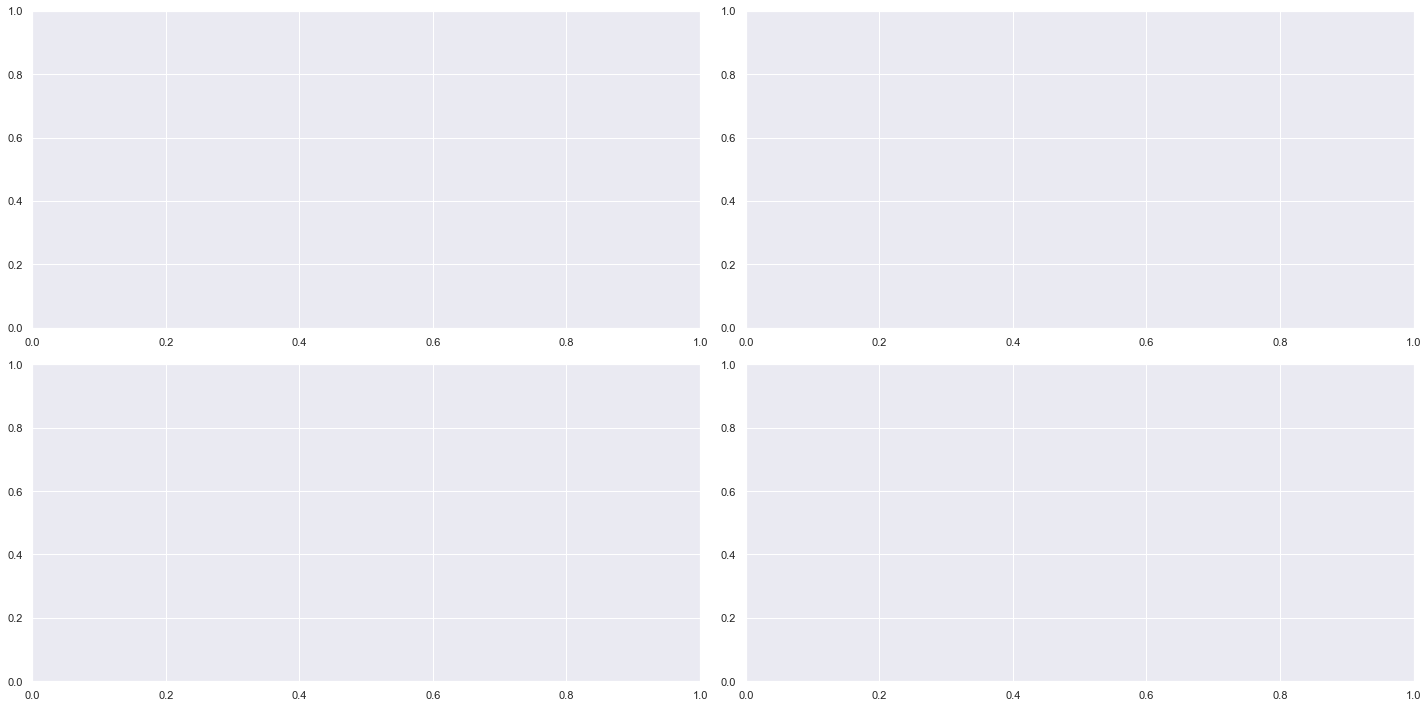

In [188]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
for num,value in enumerate(list_type):
    ax[num//2][num%2].bar(glcm_df['Label'], glcm_df[value])
    ax[num//2][num%2].set_xticklabels(glcm_df['Label'], rotation=45)
    # plt.title(f'{type.capitalize()} histogram')
    ax[num//2][num%2].set_title(f'{type.capitalize()} histogram', weight='bold')
plt.tight_layout()

C:\Users\Windows\AppData\Local\Temp/ipykernel_11660/3300467930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5][i%5].set_xticklabels(glcm_df['label'], rotation=45)
C:\Users\Windows\AppData\Local\Temp/ipykernel_11660/3300467930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5][i%5].set_xticklabels(glcm_df['label'], rotation=45)
C:\Users\Windows\AppData\Local\Temp/ipykernel_11660/3300467930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5][i%5].set_xticklabels(glcm_df['label'], rotation=45)
C:\Users\Windows\AppData\Local\Temp/ipykernel_11660/3300467930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5][i%5].set_xticklabels(glcm_df['label'], rotation=45)
C:\Users\Windows\AppData\Local\Temp/ipykernel_11660/3300467930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i//5][i%5].set_xticklab

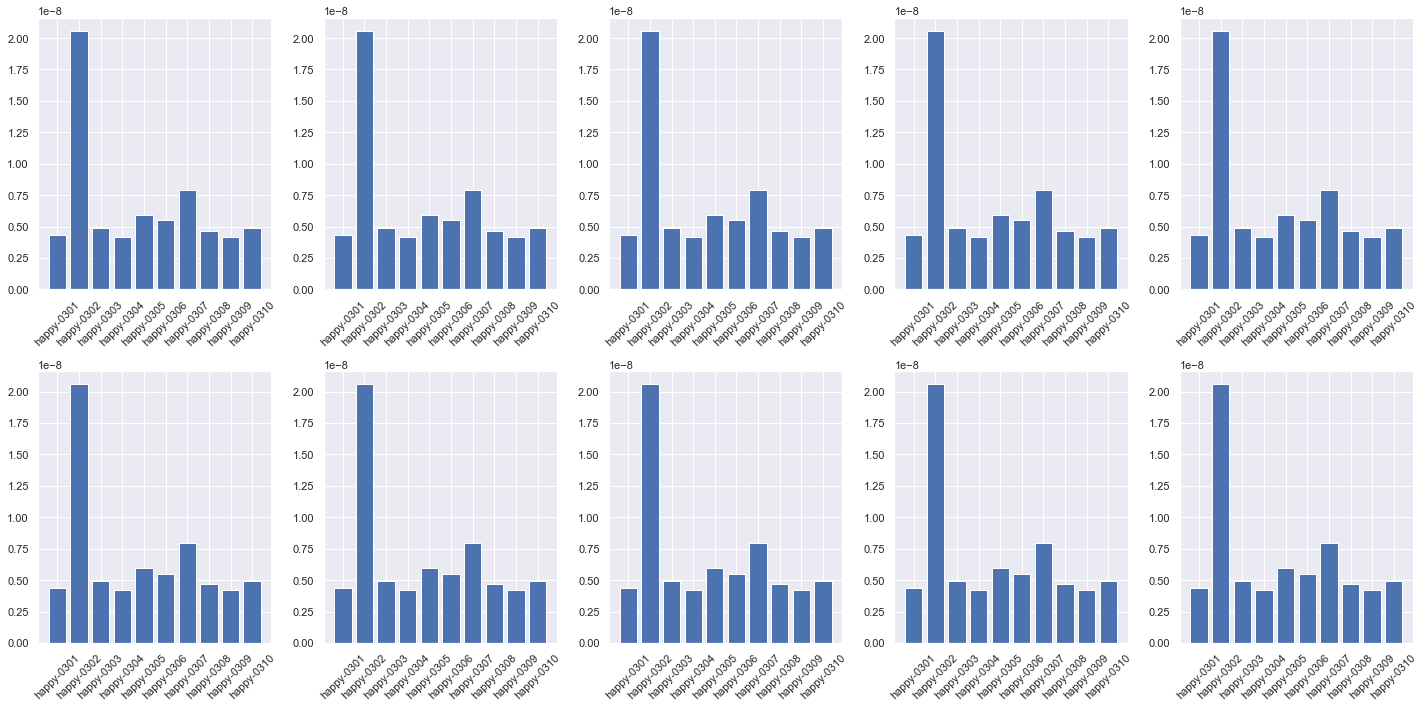

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
for i in range(10):
    ax[i//5][i%5].bar(glcm_df['label'], glcm_df['Variance'])
    ax[i//5][i%5].set_xticklabels(glcm_df['label'], rotation=45)
plt.tight_layout()
plt.show()

In [172]:
test= ['asd','asdgasss','testinggggg','sada']
list_test = [x for x in test if x.__contains__('test')]
list_test

['testinggggg']

In [ ]:
import SimpleITK as sitk
from radiomics import featureextractor
extractor = featureextractor.RadiomicsFeatureExtractor()
for i in image_allowed:
    for y in ['happy','sad','neutral']:
        image = io.imread(f'{DDIR}/{y}/{y}-{i:04d}.jpg')
        im = sitk.GetImageFromArray(image)
        test_arr = np.ones((image.shape), dtype='uint8')
        ma = sitk.GetImageFromArray(test_arr)
        print(im,ma)
        sitk.WriteImage(im, f'{DDIR}/temp_img/image-{y}-{i:04d}.nrrd')
        sitk.WriteImage(ma, f'{DDIR}/temp_img/mask-{y}-{i:04d}.nrrd', True)  
        features = extractor.execute(f'{DDIR}/temp_img/image-{y}-{i:04d}.nrrd', f'{DDIR}/temp_img/mask-{y}-{i:04d}.nrrd')

In [ ]:
from radiomics import featureextractor

extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.settings['angles'] = [90]
extractor.settings['distances'] = [1]
result = extractor.execute(f'{DDIR}/temp_img/image-happy-0302.nrrd', f'{DDIR}/temp_img/mask-happy-0302.nrrd', label=1)
for key,value in result.items():
    if(key.__contains__('original_glcm')):
        print(key,value)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


original_glcm_Autocorrelation 59.88104770258036
original_glcm_ClusterProminence 1085.995646708829
original_glcm_ClusterShade -37.48765339639202
original_glcm_ClusterTendency 20.724636958845938
original_glcm_Contrast 1.3530420061868114
original_glcm_Correlation 0.8771467462869986
original_glcm_DifferenceAverage 0.5914417345706957
original_glcm_DifferenceEntropy 1.4972034734488657
original_glcm_DifferenceVariance 0.99411815834699
original_glcm_Id 0.7858612034013093
original_glcm_Idm 0.7694009383039087
original_glcm_Idmn 0.9899327680809941
original_glcm_Idn 0.9549409040483309
original_glcm_Imc1 -0.4476984859197205
original_glcm_Imc2 0.9628346714195101
original_glcm_InverseVariance 0.2769842935078229
original_glcm_JointAverage 7.41876155311604
original_glcm_JointEnergy 0.0746461988362751
original_glcm_JointEntropy 4.59523646587203
original_glcm_MCC 0.9123617910521813
original_glcm_MaximumProbability 0.15036498415572658
original_glcm_SumAverage 14.83752310623208
original_glcm_SumEntropy 3.7

In [ ]:
# for key,value in result.items():
#     if(key.__contains__('original_glcm')):
#         print(key,value)

In [ ]:
from radiomics.glcm import RadiomicsGLCM

image = io.imread(f'{DDIR}/happy/happy-0302.jpg')
im = sitk.GetImageFromArray(image)
test_arr = np.ones((image.shape), dtype='uint8')
ma = sitk.GetImageFromArray(test_arr)
resulted_glcm_radiomics = RadiomicsGLCM(im,ma,{'theta':0,'distances':[1]})

TypeError: RadiomicsGLCM.__init__() takes 3 positional arguments but 4 were given

In [ ]:
resulted_glcm_radiomics.execute()

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


{'Autocorrelation': array(59.8810477),
 'ClusterProminence': array(1085.99564671),
 'ClusterShade': array(-37.4876534),
 'ClusterTendency': array(20.72463696),
 'Contrast': array(1.35304201),
 'Correlation': array(0.87714675),
 'DifferenceAverage': array(0.59144173),
 'DifferenceEntropy': array(1.49720347),
 'DifferenceVariance': array(0.99411816),
 'Id': array(0.7858612),
 'Idm': array(0.76940094),
 'Idmn': array(0.98993277),
 'Idn': array(0.9549409),
 'Imc1': array(-0.44769849),
 'Imc2': array(0.96283467),
 'InverseVariance': array(0.27698429),
 'JointAverage': array(7.41876155),
 'JointEnergy': array(0.0746462),
 'JointEntropy': array(4.59523647),
 'MCC': array(0.91236179),
 'MaximumProbability': array(0.15036498),
 'SumAverage': array(14.83752311),
 'SumEntropy': array(3.71838912),
 'SumSquares': array(5.51941974)}